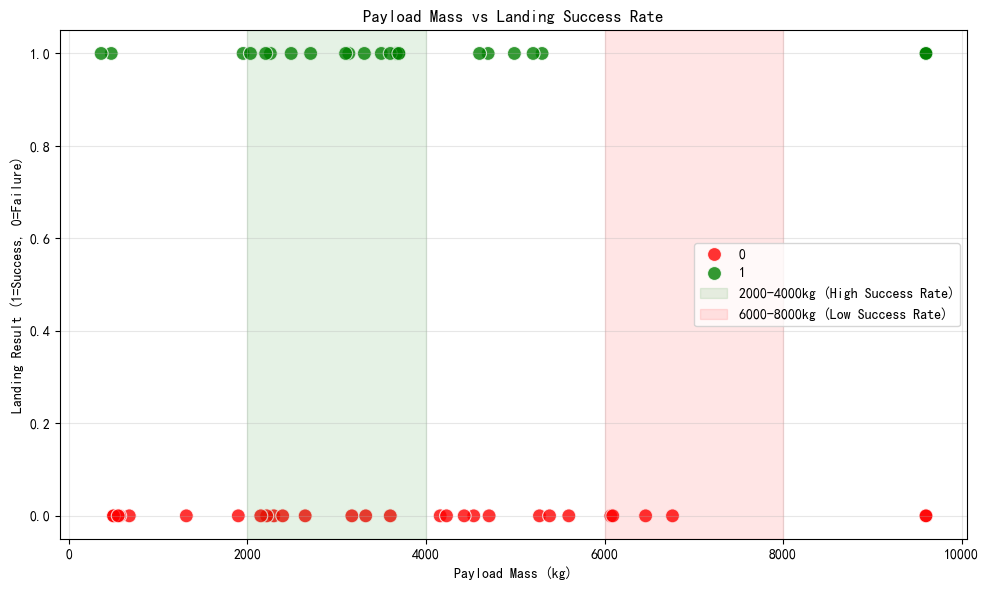

C:\Users\18398\AppData\Local\Temp\ipykernel_17084\999738828.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\18398\AppData\Local\Temp\ipykernel_17084\999738828.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


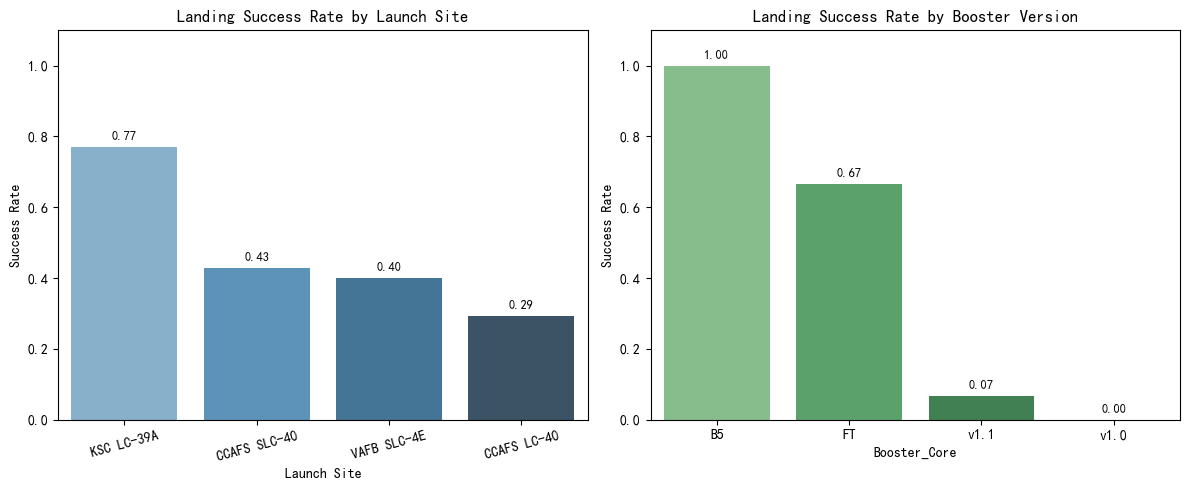

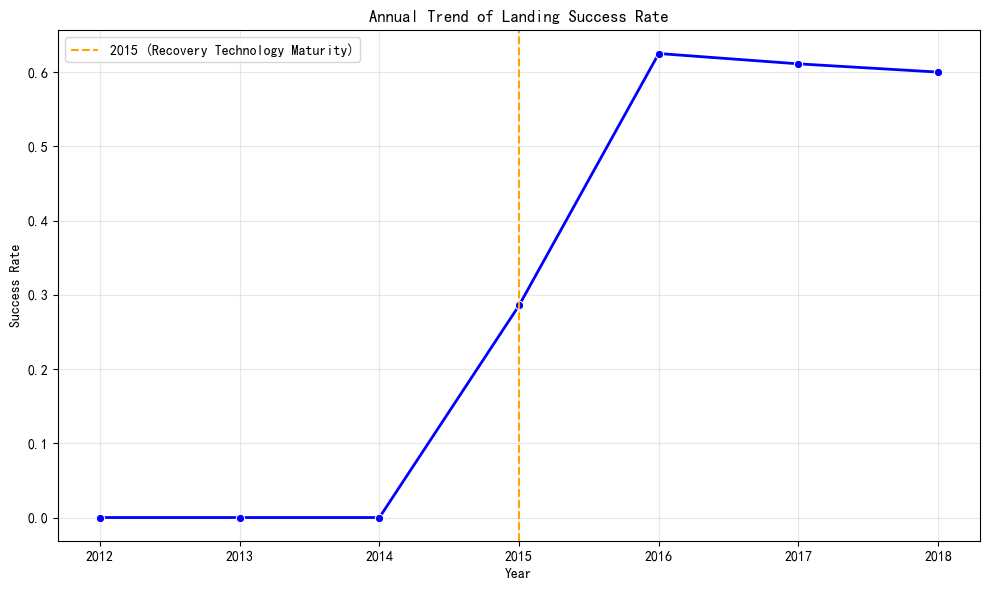

In [3]:
# ===================== Install Dependencies (Run for the first time) =====================
# pip install pandas matplotlib seaborn plotly numpy

# ===================== Import Core Libraries =====================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from datetime import datetime

# Set font display (Solve Matplotlib Chinese garbled character issue)
# Note: This part can be retained even with English text for compatibility
plt.rcParams['font.sans-serif'] = ['SimHei']  # SimHei font
plt.rcParams['axes.unicode_minus'] = False    # Fix negative sign display issue

# ===================== Load Datasets (Same URL as in your project) =====================
# Load main dataset (contains core fields: launch results, payload, launch site, etc.)
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_dash.csv"
df = pd.read_csv(url)

# Load supplementary dataset (for annual trend analysis)
url2 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_2/data/Spacex.csv"
df_supplement = pd.read_csv(url2)

# ===================== Data Preprocessing (Match PPT results) =====================
# 1. Merge datasets: Add date field for annual trend analysis
df['Date'] = df_supplement['Date'].iloc[:len(df)]  # Align data length
# Extract year
df['Year'] = pd.to_datetime(df['Date']).dt.year
# Define success label (1=Success, 0=Failure)
df['Success'] = df['class']

# 2. Filter payload range (Exclude 0 values for test missions)
df = df[df['Payload Mass (kg)'] > 0]

# ===================== 1. Scatter Plot: Payload Mass vs Landing Success Rate =====================
plt.figure(figsize=(10, 6))
# Draw scatter plot, colored by success/failure
sns.scatterplot(
    x='Payload Mass (kg)', 
    y='Success', 
    data=df,
    hue='Success', 
    palette={1: 'green', 0: 'red'},
    s=100,  # Point size
    alpha=0.8
)
# Add interval annotations (Match PPT conclusion: High success density at 2000-4000kg, more failures at 6000-8000kg)
plt.axvspan(2000, 4000, color='green', alpha=0.1, label='2000-4000kg (High Success Rate)')
plt.axvspan(6000, 8000, color='red', alpha=0.1, label='6000-8000kg (Low Success Rate)')
# Chart style
plt.title('Payload Mass vs Landing Success Rate', fontsize=12)
plt.xlabel('Payload Mass (kg)', fontsize=10)
plt.ylabel('Landing Result (1=Success, 0=Failure)', fontsize=10)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('scatter_plot.png', dpi=300)  # Save image (for PPT)
plt.show()

# ===================== 2. Bar Chart: Success Rate Comparison by Launch Site/Booster Version =====================
# 2.1 Bar chart of success rate by launch site
plt.figure(figsize=(12, 5))
# Subplot 1: Success rate by launch site
plt.subplot(1, 2, 1)
site_success = df.groupby('Launch Site')['Success'].mean().sort_values(ascending=False)
sns.barplot(
    x=site_success.index, 
    y=site_success.values,
    palette='Blues_d'
)
# Annotate success rate values
for i, v in enumerate(site_success.values):
    plt.text(i, v+0.02, f'{v:.2f}', ha='center', fontsize=9)
plt.title('Landing Success Rate by Launch Site', fontsize=12)
plt.ylabel('Success Rate', fontsize=10)
plt.xticks(rotation=15)
plt.ylim(0, 1.1)

# 2.2 Bar chart of success rate by booster version
plt.subplot(1, 2, 2)
# Extract core booster versions (e.g., FT, v1.1, etc.)
df['Booster_Core'] = df['Booster Version Category'].str.extract(r'(FT|v1\.1|v1\.0|B5)')
booster_success = df.groupby('Booster_Core')['Success'].mean().sort_values(ascending=False)
sns.barplot(
    x=booster_success.index, 
    y=booster_success.values,
    palette='Greens_d'
)
# Annotate success rate values
for i, v in enumerate(booster_success.values):
    plt.text(i, v+0.02, f'{v:.2f}', ha='center', fontsize=9)
plt.title('Landing Success Rate by Booster Version', fontsize=12)
plt.ylabel('Success Rate', fontsize=10)
plt.ylim(0, 1.1)

plt.tight_layout()
plt.savefig('bar_chart.png', dpi=300)  # Save image (for PPT)
plt.show()

# ===================== 3. Annual Trend Chart: Success Rate Changes Over Time =====================
plt.figure(figsize=(10, 6))
# Calculate success rate by year
yearly_success = df.groupby('Year')['Success'].mean()
# Draw line chart
sns.lineplot(
    x=yearly_success.index, 
    y=yearly_success.values,
    marker='o', 
    linewidth=2,
    color='blue'
)
# Annotate 2015 (Technology maturity node)
plt.axvline(x=2015, color='orange', linestyle='--', label='2015 (Recovery Technology Maturity)')
# Chart style
plt.title('Annual Trend of Landing Success Rate', fontsize=12)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Success Rate', fontsize=10)
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(yearly_success.index)
plt.tight_layout()
plt.savefig('trend_chart.png', dpi=300)  # Save image (for PPT)
plt.show()